# Import Data from Activity Day Summary
Due to potential privacy issues, the file activity_day_summary.csv is not shared
CSV for calories has been filtered so we can import only important columns

In [1]:
import pandas as pd

activity_daily = pd.read_csv("activity_day_summary.csv", header=1, index_col=False)


# heart_rate_daily = pd.read_csv("heart_rate_tracker.csv", skiprows=1, index_col=False)

# Import calorie data

In [2]:
calories_daily = pd.read_csv("calories_burnt_details.csv", header=1, index_col=False)
calories_daily.columns = [column.split(".")[-1] for column in calories_daily.columns]
calories_daily = calories_daily.loc[:, ["day_time", "rest_calorie", "active_calorie"]]
calories_daily

,day_time,rest_calorie,active_calorie
0,1667865600000,1541.9856,146.209920
1,1665532800000,1661.4569,0.000000
2,1665619200000,1661.4569,0.000000
3,1665705600000,1661.4569,0.000000
4,1665792000000,1661.4569,0.000000
...,...,...,...
932,1699660800000,1563.5586,317.790100
933,1699747200000,1627.6676,18.559998
934,1699833600000,1451.2975,754.790340
935,1699920000000,1626.8094,20.049997


## Merge the 2 tables

In [3]:
activity_daily = activity_daily.merge(calories_daily, how = "outer", on = "day_time", indicator=True)
# activity_daily = activity_daily.merge(heart_rate_daily, how = "outer", on = "extra_data", suffixes= ("activity_daily", "heart_rate_daily"), indicator=True)

Drop columns with all NA values

In [4]:
activity_daily.dropna(axis=1, how = "all", inplace=True)

Check the metadata

In [5]:
activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   step_count           937 non-null    int64   
 1   active_time          937 non-null    int64   
 2   target               559 non-null    float64 
 3   others_time          937 non-null    int64   
 4   update_time          937 non-null    object  
 5   create_time          937 non-null    object  
 6   goal                 937 non-null    int64   
 7   longest_active_time  937 non-null    int64   
 8   score                937 non-null    int64   
 9   distance             937 non-null    float64 
 10  calorie              937 non-null    float64 
 11  extra_data           937 non-null    object  
 12  deviceuuid           937 non-null    object  
 13  run_time             937 non-null    int64   
 14  pkg_name             937 non-null    object  
 15  walk_time            93

Format the day_time column to a normal datetime format

In [6]:
activity_daily['day_time'] = pd.to_datetime(activity_daily['day_time'], unit = 'ms')

Only get data from Week 1 onwards

In [7]:
start_date = pd.Timestamp('2023-08-07')
activity_daily = activity_daily.loc[activity_daily.day_time >= start_date]
activity_daily.reset_index(inplace=True, drop=True)

Remove all columns that only contain 0s

In [8]:
activity_daily = activity_daily.loc[:, (activity_daily != 0).any(axis=0)]

Unsure if the columns **others_time, goal and target** are important, check if they are significant or all have the same values

In [9]:
activity_daily.loc[activity_daily.others_time != 0]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge
49,7846,4747275,90.0,331000,2023-09-25 13:22:51.980,2023-09-24 16:00:00.776,-1,985151,86,5866.851,...,zGhikmndmN,47989,com.sec.android.app.shealth,4368286,36780000,7eba06f1-cdfd-44e1-a3c9-f9dd12449385,2023-09-25,1494.3176,358.79993,both


In [10]:
activity_daily.loc[activity_daily.goal != -1]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge


In [11]:
activity_daily.loc[activity_daily.target != 90]

,step_count,active_time,target,others_time,update_time,create_time,goal,longest_active_time,score,distance,...,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time,rest_calorie,active_calorie,_merge


### Seem like they are insignificant. Filter these columns along with other irrelevant columns

In [12]:
activity_daily.drop(columns=["update_time", "create_time", "others_time", "goal", "extra_data", "deviceuuid", "pkg_name", "datauuid", "target", "_merge"], inplace=True)
activity_daily.reset_index(drop=True, inplace=True)

### I realised that Samsung Health could not properly track run_time even when I was playing tennis
As such, I will just use active_time and drop run_time and walk_time too

### calorie also only seems to account for active_calorie
I will drop calorie

In [13]:
activity_daily.drop(columns=["run_time", "walk_time", "calorie"], inplace=True)
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
0,5285,3381817,240000,62,3803.8489,21720000,2023-08-07,1519.3068,174.290020
1,6309,3835684,360000,70,4794.8000,25920000,2023-08-08,1511.0006,194.849870
2,4882,2970008,360000,54,3722.5593,38460000,2023-08-09,1526.8431,148.599990
3,9277,5698015,300000,104,6936.2207,24600000,2023-08-10,1476.9182,287.869870
4,1854,1222551,120000,22,1384.6500,43560000,2023-08-11,1558.8231,57.369995
...,...,...,...,...,...,...,...,...,...
96,6876,3764388,1080000,67,5788.7026,35340000,2023-11-11,1563.5586,317.790100
97,570,376158,60000,6,414.1900,32760000,2023-11-12,1627.6676,18.559998
98,15243,9697495,6444013,178,11758.6420,34140000,2023-11-13,1451.2975,754.790340
99,645,421514,60000,7,481.5800,44700000,2023-11-14,1626.8094,20.049997


Samsung Health has millisecond formats for duration. Convert them to minutes with a function

In [14]:
def convert_ms_to_min(ms):
    return ms / 60000

# activity_daily[['active_time', 'longest_active_time', 'run_time', 'walk_time', 'longest_idle_time']] = activity_daily[['active_time', 'longest_active_time', 'run_time', 'walk_time', 'longest_idle_time']].map(convert_ms_to_min)
activity_daily[['active_time', 'longest_active_time', 'longest_idle_time']] = activity_daily[['active_time', 'longest_active_time', 'longest_idle_time']].map(convert_ms_to_min)

Some days were not in order. Sort the dates

In [15]:
activity_daily.sort_values(by="day_time", inplace=True)

In [16]:
activity_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   step_count           101 non-null    int64         
 1   active_time          101 non-null    float64       
 2   longest_active_time  101 non-null    float64       
 3   score                101 non-null    int64         
 4   distance             101 non-null    float64       
 5   longest_idle_time    101 non-null    float64       
 6   day_time             101 non-null    datetime64[ns]
 7   rest_calorie         101 non-null    float64       
 8   active_calorie       101 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 7.9 KB


In [17]:
activity_daily.describe()

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101,101.000000,101.000000
mean,4303.247525,43.903018,10.696129,47.722772,3266.108495,552.237624,2023-09-26 00:00:00,1531.440465,154.392047
min,61.000000,0.678117,0.478017,0.000000,45.140000,284.000000,2023-08-07 00:00:00,736.373300,1.840000
25%,1989.000000,20.917567,4.000000,22.000000,1438.409900,432.000000,2023-09-01 00:00:00,1518.584200,63.479992
50%,4361.000000,44.138183,7.000000,48.000000,3288.700700,526.000000,2023-09-26 00:00:00,1541.056800,143.829960
75%,5876.000000,59.860350,14.099783,65.000000,4507.978000,613.000000,2023-10-21 00:00:00,1561.145100,210.250730
max,15243.000000,161.624917,107.400217,178.000000,11758.642000,1119.000000,2023-11-15 00:00:00,1627.667600,754.790340
std,2744.921946,28.250409,13.910275,31.336917,2099.477850,169.867074,NaN,86.588353,120.022658


In [18]:
activity_daily.corr()

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
step_count,1.000000,0.997230,0.713252,0.996887,0.999297,-0.357479,-0.019026,-0.243122,0.962301
active_time,0.997230,1.000000,0.729248,0.999895,0.995522,-0.356395,-0.017637,-0.239392,0.964823
longest_active_time,0.713252,0.729248,1.000000,0.728840,0.720807,-0.097981,0.227459,-0.213034,0.846461
score,0.996887,0.999895,0.728840,1.000000,0.994992,-0.355646,-0.020007,-0.237756,0.964201
distance,0.999297,0.995522,0.720807,0.994992,1.000000,-0.353060,-0.004909,-0.239975,0.965786
longest_idle_time,-0.357479,-0.356395,-0.097981,-0.355646,-0.353060,1.000000,0.119454,0.125107,-0.273024
day_time,-0.019026,-0.017637,0.227459,-0.020007,-0.004909,0.119454,1.000000,-0.043052,0.079270
rest_calorie,-0.243122,-0.239392,-0.213034,-0.237756,-0.239975,0.125107,-0.043052,1.000000,-0.225644
active_calorie,0.962301,0.964823,0.846461,0.964201,0.965786,-0.273024,0.079270,-0.225644,1.000000


Text(0, 0.5, 'Active Time in Seconds')

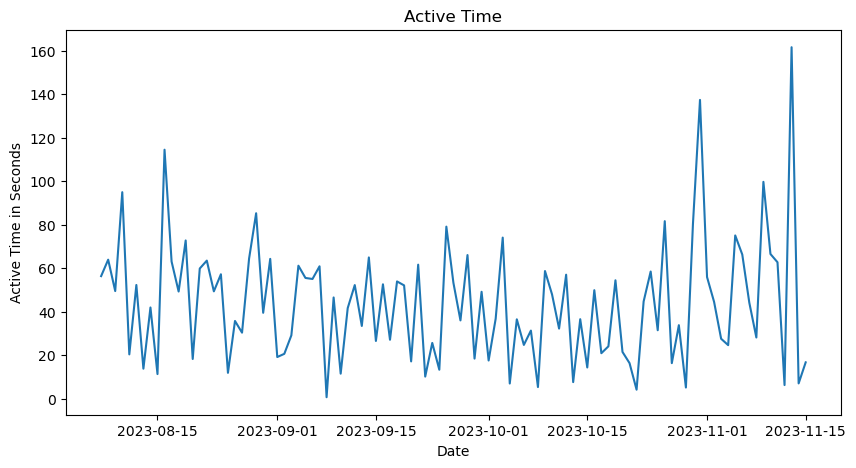

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(activity_daily.day_time, activity_daily['active_time'])
plt.title('Active Time')
plt.xlabel('Date')
plt.ylabel('Active Time in Seconds')

## Too much variation in day timeframe, switching to weekly timeframe

In [20]:
end_date = pd.Timestamp('2023-11-12')
activity_daily = activity_daily.loc[activity_daily.day_time <= end_date]
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
0,5285,56.363617,4.000000,62,3803.8489,362.0,2023-08-07,1519.3068,174.290020
1,6309,63.928067,6.000000,70,4794.8000,432.0,2023-08-08,1511.0006,194.849870
2,4882,49.500133,6.000000,54,3722.5593,641.0,2023-08-09,1526.8431,148.599990
3,9277,94.966917,5.000000,104,6936.2207,410.0,2023-08-10,1476.9182,287.869870
4,1854,20.375850,2.000000,22,1384.6500,726.0,2023-08-11,1558.8231,57.369995
...,...,...,...,...,...,...,...,...,...
93,2878,28.143067,11.975033,31,2208.2185,474.0,2023-11-08,1602.8351,118.748200
94,9854,99.719867,11.560433,110,7574.2275,444.0,2023-11-09,1521.5763,361.143370
95,5845,66.543150,35.273767,73,4524.4985,617.0,2023-11-10,1559.2406,272.191280
96,6876,62.739800,18.000000,67,5788.7026,589.0,2023-11-11,1563.5586,317.790100


In [21]:
# activity_daily.info()

Group dates in groups of 7

In [22]:
import numpy as np

activity_daily["week"] = np.arange(len(activity_daily)) // 7 + 1
activity_daily.set_index("week")

activity_weekly = activity_daily.groupby("week").mean()
activity_weekly.index = [i for i in activity_daily["week"].unique()]
activity_weekly

/tmp/ipykernel_21167/245633459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_daily["week"] = np.arange(len(activity_daily)) // 7 + 1


,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106


# Line Graph Plotting to compare over time

Plot all the indicators to observe trends over the weeks

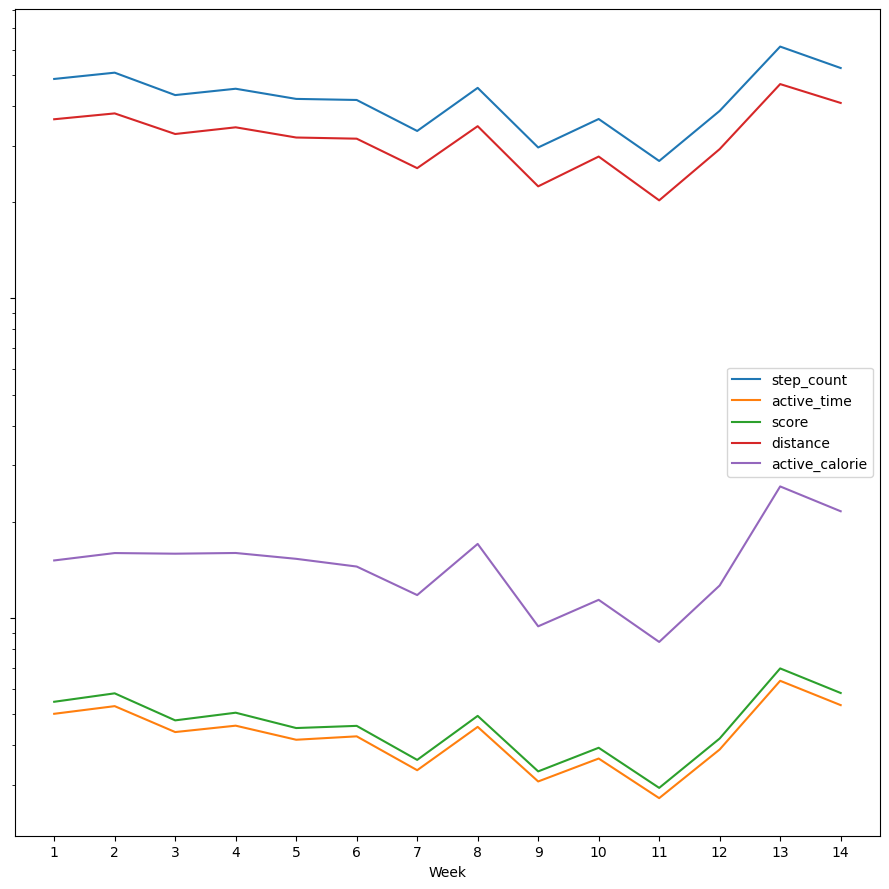

In [23]:
ax = activity_weekly[["step_count", "active_time", "score", "distance", "active_calorie"]].plot(figsize=(9,9), label='Active Time', sharey=False, sharex=False, xticks=activity_weekly.index, xlabel="Week", logy=True)
ax.set_yticklabels([])
plt.tight_layout()

plt.show()

### Because Samsung health did not manage to capture running activites, try to get the effectiveness of each active time period
- compare the **relative calories** burnt per active time
- compare the **relative distance** covered per active time

In [24]:
activity_weekly['calories_per_active_time'] = activity_weekly.active_calorie / activity_weekly.active_time
activity_weekly['distance_per_active_time'] = activity_weekly.distance / activity_weekly.active_time
activity_weekly

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,calories_per_active_time,distance_per_active_time
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963,3.017572,72.367477
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343,3.011666,71.433125
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104,3.613093,74.222552
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912,3.468251,74.383937
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059,3.680078,76.489086
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454,3.396915,74.013623
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333,3.530310,76.396028
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032,3.734833,75.649965
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676,3.056711,72.668973
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106,3.135901,76.351785


Calries per active time vs Active time

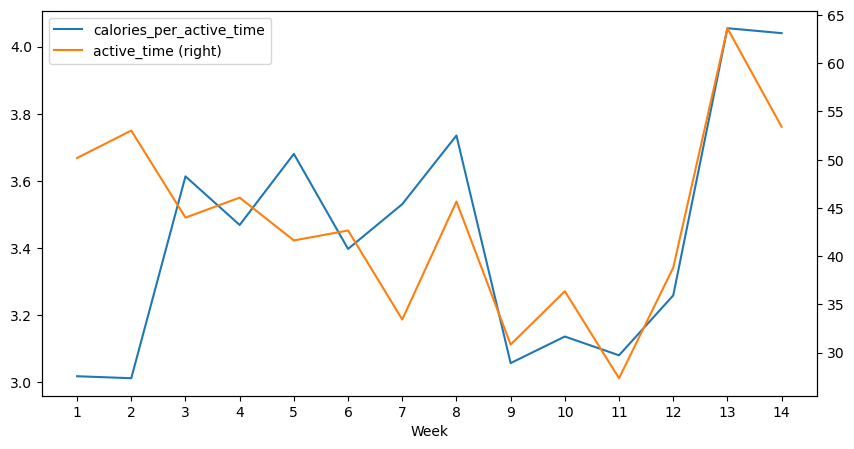

In [25]:
ax = activity_weekly.plot(y = ["calories_per_active_time", "active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["active_time"])

plt.show()

Distance per active time vs Active time

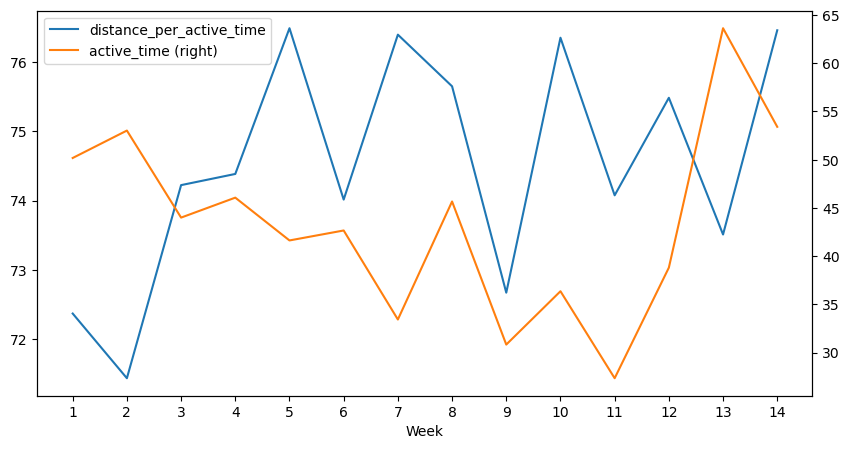

In [26]:
ax = activity_weekly.plot(y = ["distance_per_active_time", "active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["active_time"])

plt.show()

### Interesting fact: Average idle time seems to be inversely related to active time

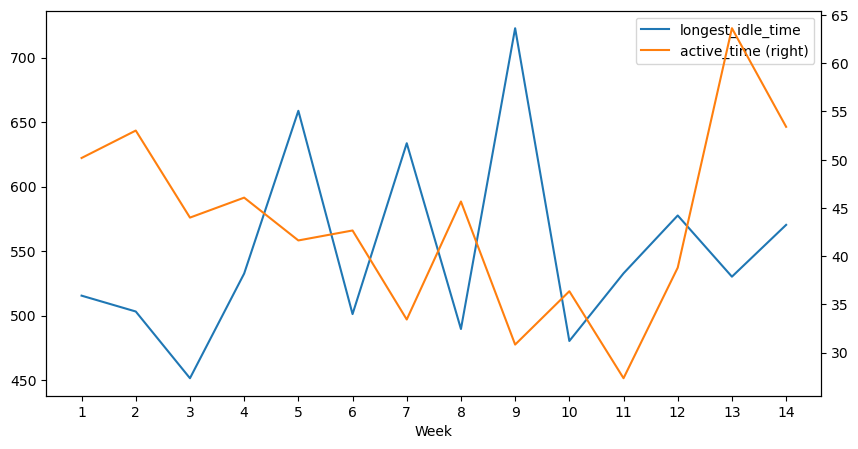

In [27]:
ax = activity_weekly.plot(y = ["longest_idle_time", "active_time"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week", secondary_y=["active_time"])

## Check total calories

In [28]:
activity_weekly["total_calories"] = activity_weekly.rest_calorie + activity_weekly.active_calorie
activity_weekly

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,calories_per_active_time,distance_per_active_time,total_calories
1,4853.857143,50.176088,4.285714,54.714286,3631.116886,515.428571,2023-08-10,1526.100929,151.409963,3.017572,72.367477,1677.510891
2,5078.571429,53.020595,8.284326,58.142857,3787.426806,503.142857,2023-08-17,1522.977457,159.680343,3.011666,71.433125,1682.657800
3,4321.428571,43.992812,10.590719,47.857143,3265.258767,451.428571,2023-08-24,1532.890443,158.950104,3.613093,74.222552,1691.840547
4,4523.571429,46.062957,9.665352,50.571429,3426.344086,532.571429,2023-08-31,1530.617343,159.757912,3.468251,74.383937,1690.375254
5,4204.428571,41.623588,11.722617,45.285714,3183.750191,658.714286,2023-09-07,1535.492000,153.178059,3.680078,76.489086,1688.670059
6,4172.142857,42.657074,9.592490,46.000000,3157.204600,501.142857,2023-09-14,1534.357186,144.902454,3.396915,74.013623,1679.259640
7,3337.428571,33.422655,7.831610,36.000000,2553.358077,633.571429,2023-09-21,1544.497100,117.992333,3.530310,76.396028,1662.489433
8,4552.285714,45.663900,8.867279,49.428571,3454.472414,489.571429,2023-09-28,1531.055543,170.547032,3.734833,75.649965,1701.602574
9,2963.428571,30.822895,4.940169,33.142857,2239.868134,722.714286,2023-10-05,1547.351743,94.216676,3.056711,72.668973,1641.568419
10,3637.714286,36.355450,8.569048,39.285714,2775.803514,480.285714,2023-10-12,1541.276686,114.007106,3.135901,76.351785,1655.283791


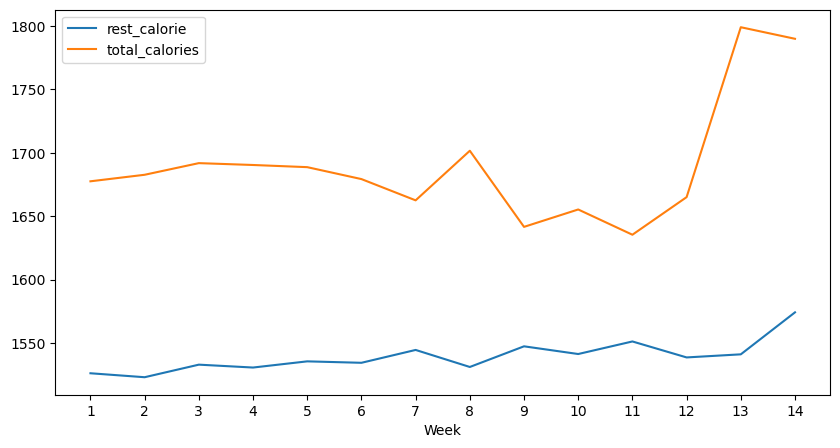

In [29]:
ax = activity_weekly.plot(y = ["rest_calorie", "total_calories"], figsize=(10,5), xticks=activity_weekly.index, xlabel="Week")

# Comparing weekdays

In [30]:
activity_daily["weekday"] = activity_daily["day_time"].dt.day_name()
activity_daily

/tmp/ipykernel_21167/2263651484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_daily["weekday"] = activity_daily["day_time"].dt.day_name()


,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week,weekday
0,5285,56.363617,4.000000,62,3803.8489,362.0,2023-08-07,1519.3068,174.290020,1,Monday
1,6309,63.928067,6.000000,70,4794.8000,432.0,2023-08-08,1511.0006,194.849870,1,Tuesday
2,4882,49.500133,6.000000,54,3722.5593,641.0,2023-08-09,1526.8431,148.599990,1,Wednesday
3,9277,94.966917,5.000000,104,6936.2207,410.0,2023-08-10,1476.9182,287.869870,1,Thursday
4,1854,20.375850,2.000000,22,1384.6500,726.0,2023-08-11,1558.8231,57.369995,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
93,2878,28.143067,11.975033,31,2208.2185,474.0,2023-11-08,1602.8351,118.748200,14,Wednesday
94,9854,99.719867,11.560433,110,7574.2275,444.0,2023-11-09,1521.5763,361.143370,14,Thursday
95,5845,66.543150,35.273767,73,4524.4985,617.0,2023-11-10,1559.2406,272.191280,14,Friday
96,6876,62.739800,18.000000,67,5788.7026,589.0,2023-11-11,1563.5586,317.790100,14,Saturday


## Pie chart plotting to compare between weekdays

In [31]:
activity_weekday_mean = activity_daily.groupby("weekday").agg("mean")
activity_weekday_mean

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week
weekday,,,,,,,,,,
Friday,2157.000000,22.918690,6.196556,24.571429,1628.684255,682.857143,2023-09-25 12:00:00,1563.436264,73.623721,7.5
Monday,5658.642857,56.802192,12.825413,61.857143,4275.402986,535.000000,2023-09-21 12:00:00,1522.476529,208.534635,7.5
Saturday,3891.571429,40.055589,7.195320,43.285714,2962.029786,515.000000,2023-09-26 12:00:00,1544.636950,129.893780,7.5
Sunday,1841.214286,19.386294,5.376723,20.571429,1395.222964,617.357143,2023-09-27 12:00:00,1567.348907,65.203804,7.5
Thursday,6311.285714,64.782157,8.886837,71.000000,4779.860279,429.642857,2023-09-24 12:00:00,1517.334679,209.829872,7.5
Tuesday,5857.071429,58.586239,17.138669,64.142857,4457.982396,558.571429,2023-09-22 12:00:00,1520.576557,221.473171,7.5
Wednesday,4068.500000,40.957498,11.016825,44.428571,3095.641327,511.214286,2023-09-23 12:00:00,1539.976314,145.957189,7.5


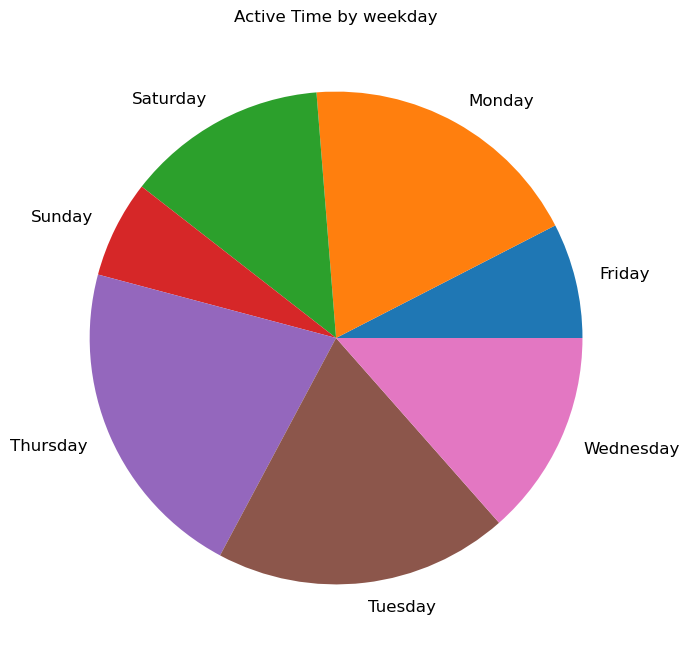

In [32]:
activity_weekday_mean.active_time.plot(kind = "pie", figsize = (12,8), fontsize = 12, title="Active Time by weekday", ylabel='')
plt.show()

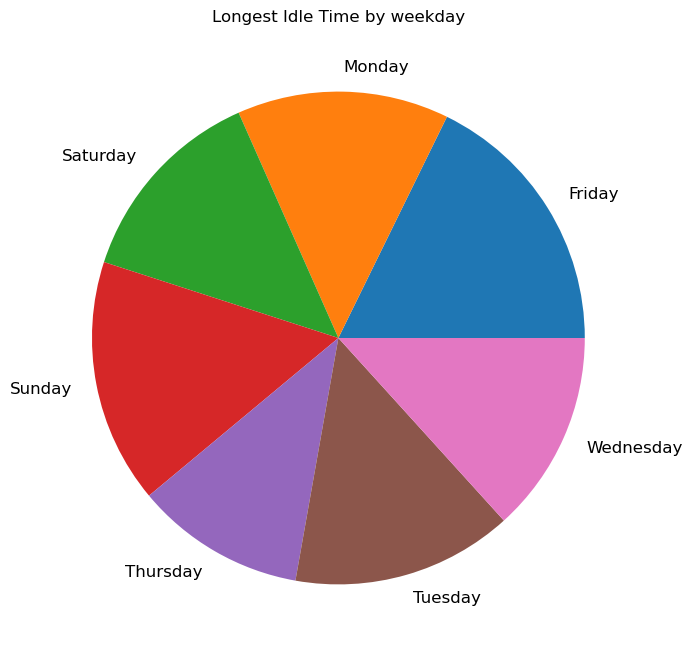

In [33]:
activity_weekday_mean.longest_idle_time.plot(kind = "pie", figsize = (12,8), fontsize = 12, title="Longest Idle Time by weekday", ylabel='')
plt.show()

# Plot active time over time for each weekday

In [34]:
activity_daily

,step_count,active_time,longest_active_time,score,distance,longest_idle_time,day_time,rest_calorie,active_calorie,week,weekday
0,5285,56.363617,4.000000,62,3803.8489,362.0,2023-08-07,1519.3068,174.290020,1,Monday
1,6309,63.928067,6.000000,70,4794.8000,432.0,2023-08-08,1511.0006,194.849870,1,Tuesday
2,4882,49.500133,6.000000,54,3722.5593,641.0,2023-08-09,1526.8431,148.599990,1,Wednesday
3,9277,94.966917,5.000000,104,6936.2207,410.0,2023-08-10,1476.9182,287.869870,1,Thursday
4,1854,20.375850,2.000000,22,1384.6500,726.0,2023-08-11,1558.8231,57.369995,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
93,2878,28.143067,11.975033,31,2208.2185,474.0,2023-11-08,1602.8351,118.748200,14,Wednesday
94,9854,99.719867,11.560433,110,7574.2275,444.0,2023-11-09,1521.5763,361.143370,14,Thursday
95,5845,66.543150,35.273767,73,4524.4985,617.0,2023-11-10,1559.2406,272.191280,14,Friday
96,6876,62.739800,18.000000,67,5788.7026,589.0,2023-11-11,1563.5586,317.790100,14,Saturday


Group by week and weekday

In [35]:
activity_daily.reset_index(drop=True, inplace=True)
activity_daily.set_index(["week", "weekday"], inplace=True)
activity_daily

step_count  active_time  longest_active_time  score  \
week weekday                                                          
1    Monday           5285    56.363617             4.000000     62   
     Tuesday          6309    63.928067             6.000000     70   
     Wednesday        4882    49.500133             6.000000     54   
     Thursday         9277    94.966917             5.000000    104   
     Friday           1854    20.375850             2.000000     22   
...                    ...          ...                  ...    ...   
14   Wednesday        2878    28.143067            11.975033     31   
     Thursday         9854    99.719867            11.560433    110   
     Friday           5845    66.543150            35.273767     73   
     Saturday         6876    62.739800            18.000000     67   
     Sunday            570     6.269300             1.000000      6   

                 distance  longest_idle_time   day_time  rest_calorie  \
week weekday                                                            
1    Monday     3803.8489              362.0 2023-08-07     1519.3068   
     Tuesday    4794.8000              432.0 2023-08-08     1511.0006   
     Wednesday  3722.5593              641.0 2023-08-09     1526.8431   
     Thursday   6936.2207              410.0 2023-08-10     1476.9182   
     Friday     1384.6500              726.0 2023-08-11     1558.8231   
...                   ...                ...        ...           ...   
14   Wednesday  2208.2185              474.0 2023-11-08     1602.8351   
     Thursday   7574.2275              444.0 2023-11-09     1521.5763   
     Friday     4524.4985              617.0 2023-11-10     1559.2406   
     Saturday   5788.7026              589.0 2023-11-11     1563.5586   
     Sunday      414.1900              546.0 2023-11-12     1627.6676   

                active_calorie  
week weekday                    
1    Monday         174.290020  
     Tuesday        194.849870  
     Wednesday      148.599990  
     Thursday       287.869870  
     Friday          57.369995  
...                        ...  
14   Wednesday      118.748200  
     Thursday       361.143370  
     Friday         272.191280  
     Saturday       317.790100  
     Sunday          18.559998  

[98 rows x 9 columns]

# Pivot Table

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

activity_daily = activity_daily.unstack()

new_order = [(data_type, day) for data_type in activity_daily.columns.get_level_values(0).unique() for day in day_order]
activity_daily = activity_daily.reindex(columns=new_order)

activity_daily

step_count                                                    \
weekday     Monday Tuesday Wednesday Thursday Friday Saturday Sunday   
week                                                                   
1             5285    6309      4882     9277   1854     5005   1365   
2             3928    1033     11131     6205   4696     6817   1740   
3             6142    6500      4567     5484   1130     3473   2954   
4             6258    8699      4027     6116   1841     1884   2840   
5             6509    5594      5522     6114     61     4503   1128   
6             4267    5475      3249     6025   2598     5071   2520   
7             5691    5504      1659     5822    964     2448   1274   
8             7846    5556      3611     6631   1805     4693   1724   
9             3578    7077       628     3593   2380     3002    486   
10            5970    5097      3283     5605    693     3442   1374   
11            4833    1989      2479     5347   2148     1653    372   
12            4627    5876      3366     7917   1523     3215    474   
13            7910   12929      5677     4368   2660     2400   6956   
14            6377    4361      2878     9854   5845     6876    570   

        active_time                          ... rest_calorie             \
weekday      Monday     Tuesday   Wednesday  ...       Friday   Saturday   
week                                         ...                           
1         56.363617   63.928067   49.500133  ...    1558.8231  1523.7751   
2         41.945800   11.326883  114.497700  ...    1527.0884  1501.2961   
3         59.860350   63.497750   49.366333  ...    1568.1361  1541.9479   
4         64.441583   85.276350   39.503633  ...    1560.1559  1558.5430   
5         61.155667   55.524917   55.053450  ...    1580.4523  1530.0793   
6         41.676083   52.251917   33.455667  ...    1552.0417  1523.4410   
7         53.924550   52.107950   17.150017  ...    1570.0294  1553.0411   
8         79.121250   53.308550   36.007350  ...    1560.9529  1527.2185   
9         36.788167   74.080950    6.981267  ...    1554.0431  1546.8044   
10        58.713067   47.963167   32.248817  ...    1572.8236  1541.0568   
11        49.897833   20.917567   24.076283  ...    1557.5831  1563.2440   
12        44.713067   58.486283   31.479733  ...    1563.2443  1544.0780   
13        80.318067  137.398817   55.941517  ...    1603.4932  1606.8335   
14        66.311583   44.138183   28.143067  ...    1559.2406  1563.5586   

                   active_calorie                                     \
weekday     Sunday         Monday     Tuesday   Wednesday   Thursday   
week                                                                   
1        1566.0396     174.290020  194.849870  148.599990  287.86987   
2        1561.1451     127.139950   31.599995  358.692630  192.53000   
3        1547.8547     219.457580  257.499820  210.250730  192.95198   
4        1549.2119     249.279330  328.406200  126.605316  212.11377   
5        1568.5541     250.834380  228.951430  197.880170  217.43048   
6        1551.4321     154.527680  170.799970  102.040520  241.01593   
7        1566.5638     202.914900  222.918320   51.400196  205.15295   
8        1561.9082     358.799930  218.840670  158.408690  202.46996   
9        1575.3187     110.279976  239.626820   18.999998  111.44998   
10       1565.4286     189.594480  163.829990  104.035310  170.78000   
11       1576.6560     150.859990   63.479992   80.679990  161.80997   
12       1575.5555     146.410000  185.297990  146.843250  244.25995   
13       1549.5488     305.541500  652.153300  220.215650  136.64000   
14       1627.6676     279.555180  142.370030  118.748200  361.14337   

                                             
weekday      Friday    Saturday      Sunday  
week                                         
1         57.369995  155.530000   41.359993  
2        146.509930  206.599900   54.689995  
3         34.840527  107.300080   9

In [37]:
sub_df = activity_daily.loc[:, "active_time"]
sub_df

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
week,,,,,,,
1,56.363617,63.928067,49.500133,94.966917,20.375850,52.294133,13.803900
2,41.945800,11.326883,114.497700,63.069983,49.276800,72.765817,18.261183
3,59.860350,63.497750,49.366333,57.221767,11.894550,35.744200,30.364733
4,64.441583,85.276350,39.503633,64.297183,19.162133,20.631033,29.128783
5,61.155667,55.524917,55.053450,60.886117,0.678117,46.552983,11.513867
6,41.676083,52.251917,33.455667,64.958750,26.551717,52.598417,27.106967
7,53.924550,52.107950,17.150017,61.637783,10.170250,25.641650,13.326383
8,79.121250,53.308550,36.007350,66.049350,18.436283,49.158283,17.566233
9,36.788167,74.080950,6.981267,36.506250,24.729083,31.321267,5.353283


## Create function to plot different datatypes

In [38]:
# from scipy.interpolate import interp1d

def plot_value_over_time(data_type):
    fig, axs = plt.subplots(7, 1, figsize=(12, 24)) 

    week_no = activity_daily.index
    weekdays = activity_daily.columns.get_level_values(1).unique()

    for i, day in enumerate(weekdays):

        data_for_day = activity_daily.loc[:,(data_type, day)]

        axs[i].plot(week_no, data_for_day, label=day)

        # spline = interp1d(week_no, data_for_day, kind='cubic')

        # smooth_week = np.linspace(week_no.min(), week_no.max(), 100)
        # smooth_active_time = spline(smooth_week)
        # axs[i].plot(smooth_week, smooth_active_time, label=day)
        
        axs[i].legend()
        axs[i].set_xticks(week_no)
        
    plt.show()


    # plt.title(f'{data_type} for Each Weekday Over 14 Weeks')
    # plt.xlabel('Week')
    # plt.ylabel(f'{data_type}')

    

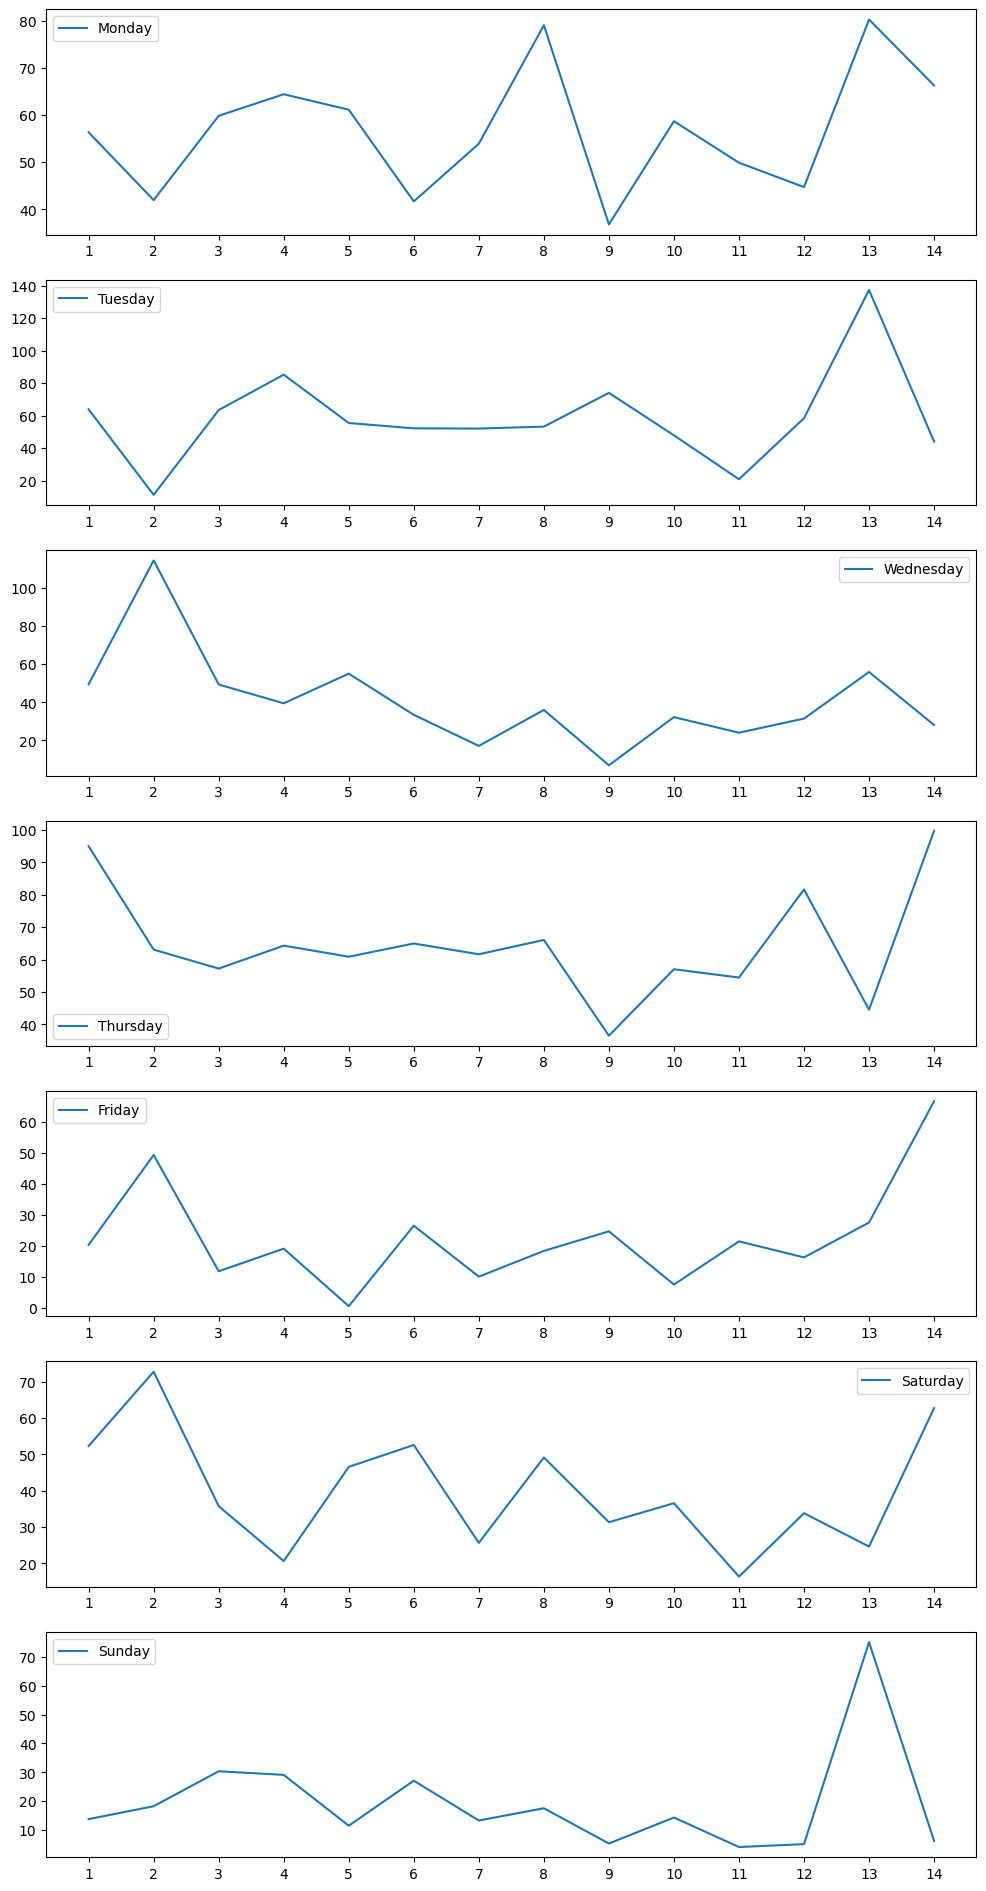

In [39]:
plot_value_over_time("active_time")

## A linear regression model would be better

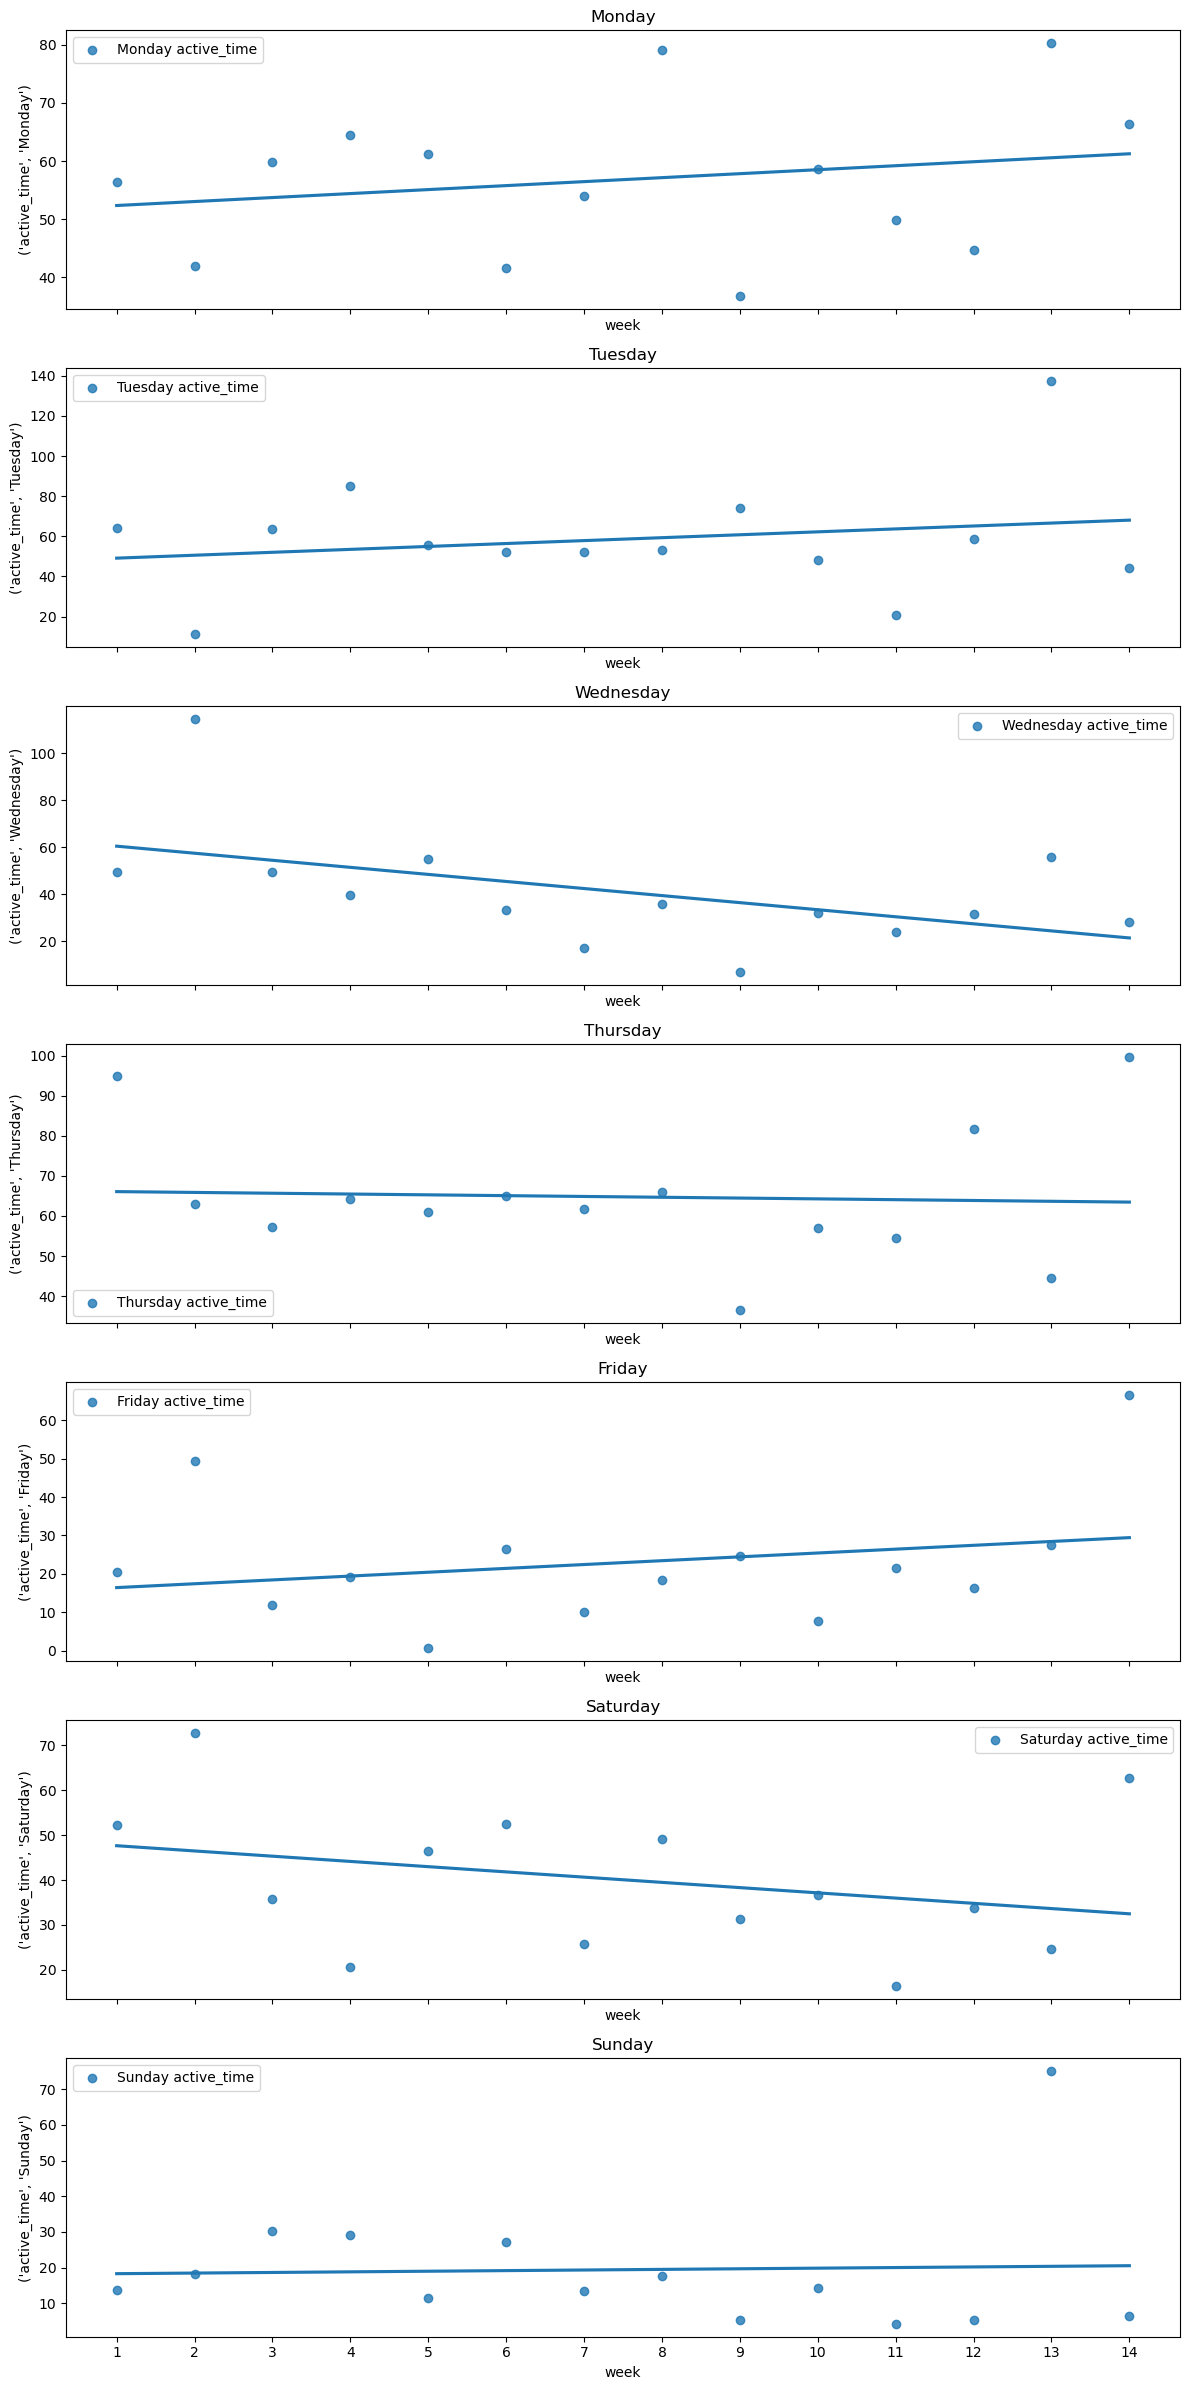

In [40]:
import seaborn as sns

def plot_value_over_time(data_type):
    fig, axs = plt.subplots(7, 1, figsize=(12, 24), sharex=True)

    week_no = activity_daily.index
    weekdays = activity_daily.columns.get_level_values(1).unique()

    for i, day in enumerate(weekdays):
        data_for_day = activity_daily.loc[:, (data_type, day)].fillna(0)  # Fill NaN values

        sns.regplot(x=week_no, y=data_for_day, ax=axs[i], ci=None, label=f'{day} {data_type}')
        
        axs[i].legend()
        axs[i].set_title(f'{day}')
        axs[i].set_xticks(week_no)
        
    # Adjust the layout
    plt.tight_layout()
    plt.show()

# Call the function with the desired data_type
plot_value_over_time('active_time')